## Pryngles Development

In [62]:
%load_ext autoreload
%autoreload 2
import pryngles as pr

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [67]:
pr.get_data("util")
pr._init.__rootdir__

'..'

![](pryngles-ideas-development.jpeg)

How I will like to call package:

In [35]:
import pryngles as pr

In [7]:
#Create the system
"""
"""
sys=pr.System()
#Set properties of objects
"""
"""
S=sys.addStar()
O=sys.addObserver()
#Add objects
"""
"""
P=sys.addPlanet(center=S)
R=sys.addRing(center=P)

In [69]:
#Create the system
"""
You may also set the properties of the system providing the information of the 

All angles are provided in radians: 30*pr.deg

By default units are in Msun,au,yr

If no hash is provided then by default hash of rebound are used.
"""
sys=pr.System(stars=[dict(hash='primary',m=1,R=1)],
              planets=[dict(center='planet',m=1e-3,R=0.1)],
              rings=[dict(center='planet',fi=1.5,fe=2.4)],
              observers=[dict(center='primary',kind='fixed',beta=30*pr.deg,lamb=50*pr.deg)],
             )

In [ ]:
#Alternative
star=dict(hash='primary',m=1,R=1)
planet=dict(center='planet',m=1e-3,R=0.1)
ring=dict(center='planet',fi=1.5,fe=2.4))
observer=dict(center='primary',kind='fixed',beta=30*pr.deg,lamb=50*pr.deg)

pr.System(stars=star,planets=planet,rings=ring)

#Or alternatively
S=pr.System()
pr.addStar(**star)
pr.addPlanet(**planet)
pr.addRing(**ring)
pr.addObserver(**observer)

In [ ]:
#Units
S=pr.System()
S.units='Msun','au','yr'


## Code in README

In [26]:
import pryngles as pr
sys=pr.System()

In [27]:
S=sys.addStar()
P=sys.addPlanet(center=S,a=0.5,e=0.2,N=1000)
R=sys.addRing(center=P,fi=1.4,fe=2.4,i=30*pr.deg,N=1500)
O=sys.addObserver()

In [28]:
RP=sys.ensambleSystem()

<IPython.core.display.Javascript object>


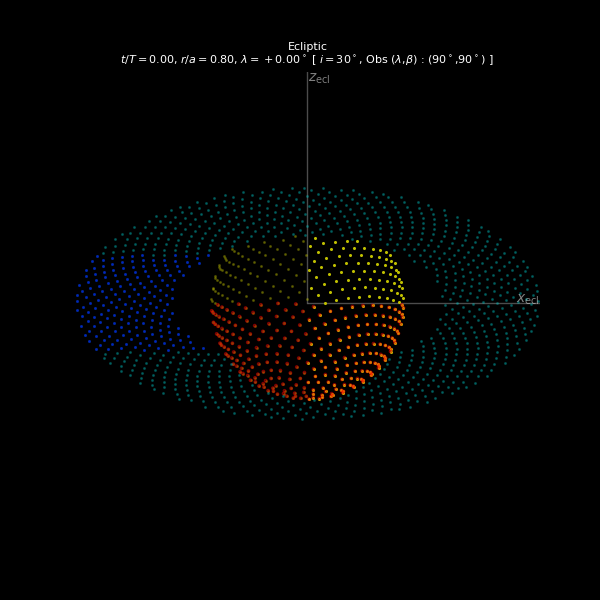

<IPython.core.display.Javascript object>


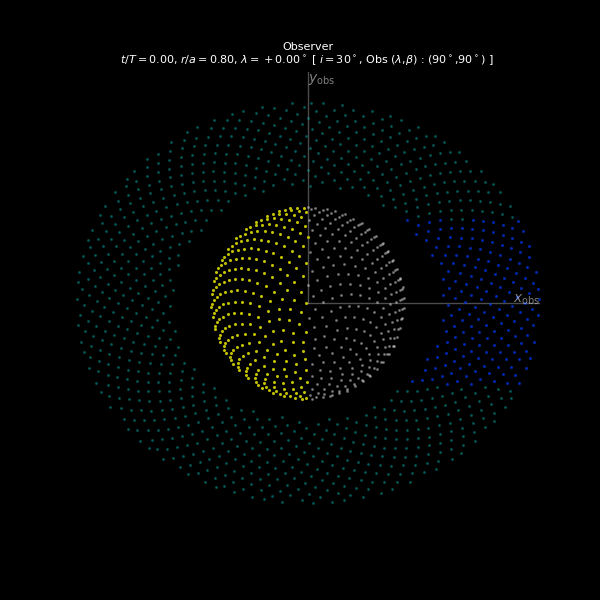

<IPython.core.display.Javascript object>


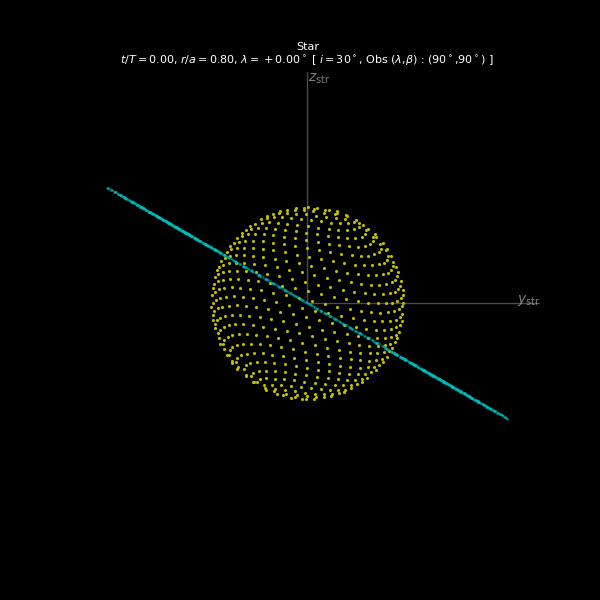

(<Figure size 600x600 with 1 Axes>,
 <Figure size 600x600 with 1 Axes>,
 <Figure size 600x600 with 1 Axes>)

In [29]:
RP.plotRingedPlanet()

<IPython.core.display.Javascript object>


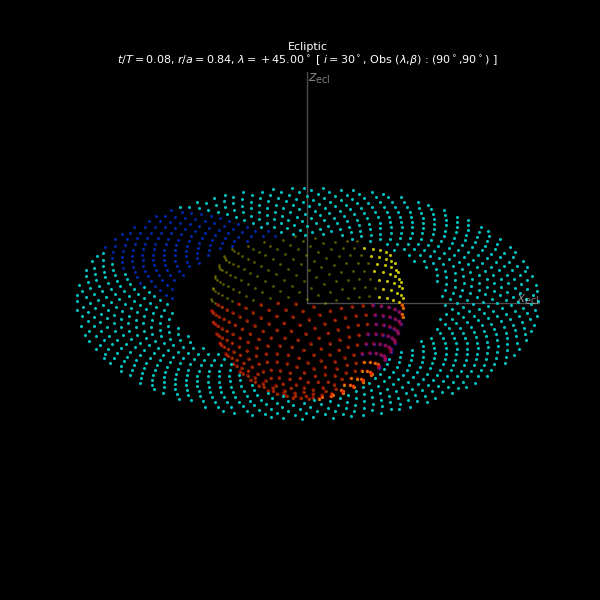

<IPython.core.display.Javascript object>


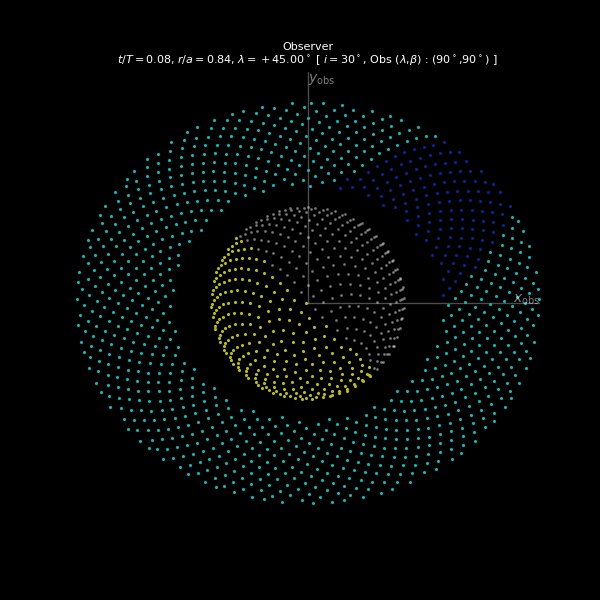

<IPython.core.display.Javascript object>


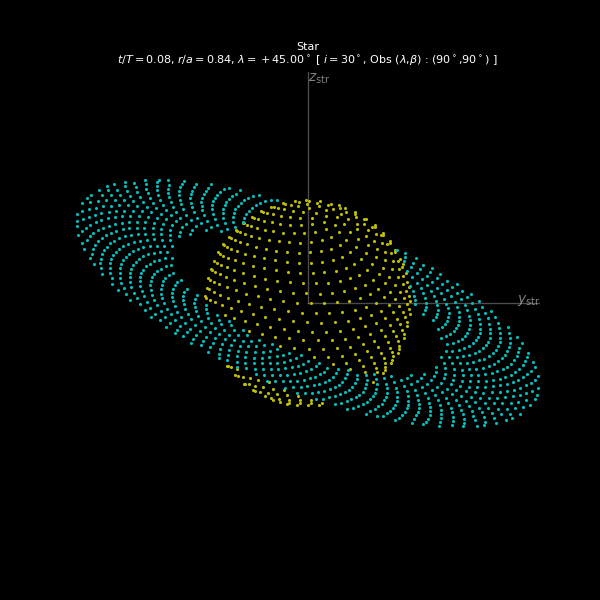

(<Figure size 600x600 with 1 Axes>,
 <Figure size 600x600 with 1 Axes>,
 <Figure size 600x600 with 1 Axes>)

In [30]:
RP.changeStellarPosition(45*pr.deg)
RP.plotRingedPlanet()

<IPython.core.display.Javascript object>


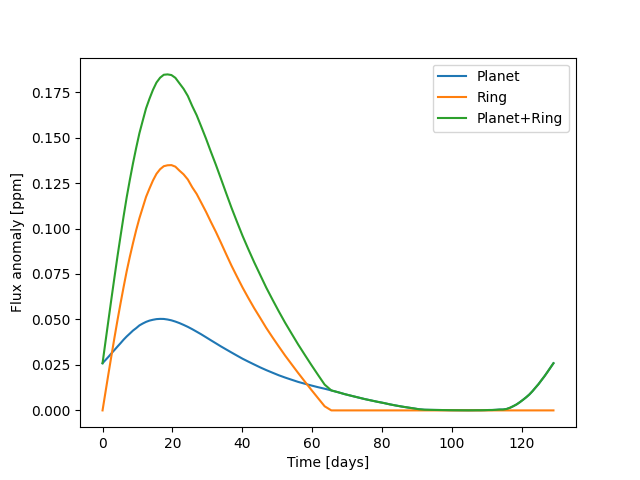

In [32]:
import numpy as np
RP.changeObserver([90*pr.deg,30*pr.deg])
lambs=np.linspace(+0.0*pr.deg,+360*pr.deg,100)
Rps=[]
Rrs=[]
ts=[]
for lamb in lambs:
    RP.changeStellarPosition(lamb)
    ts+=[RP.t*sys.ut/pr.Const.days]
    RP.updateOpticalFactors()
    RP.updateDiffuseReflection()
    Rps+=[RP.Rip.sum()]
    Rrs+=[RP.Rir.sum()]

ts=np.array(ts)
Rps=np.array(Rps)
Rrs=np.array(Rrs)

#Plot
import matplotlib.pyplot as plt
fig=plt.figure()
ax=fig.gca()
ax.plot(ts,1e6*Rps,label="Planet")
ax.plot(ts,1e6*Rrs,label="Ring")
ax.plot(ts,1e6*(Rps+Rrs),label="Planet+Ring")

ax.set_xlabel("Time [days]")
ax.set_ylabel("Flux anomaly [ppm]")
ax.legend();

fig.savefig("gallery/example-light-curve.png")

Traditional:

<IPython.core.display.Javascript object>


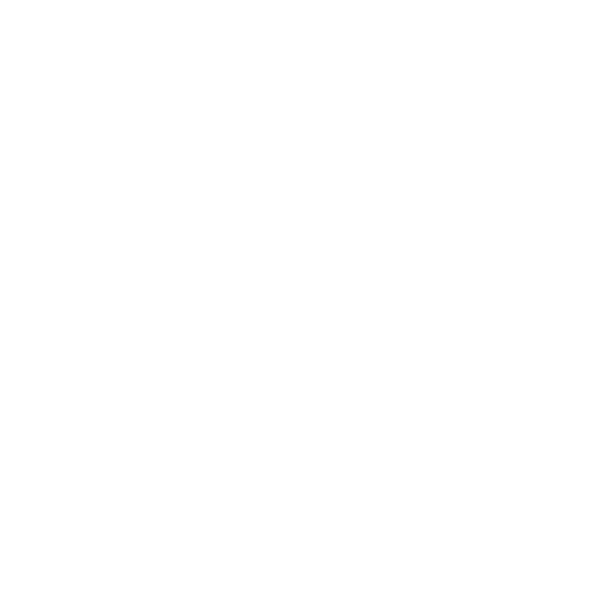

<IPython.core.display.Javascript object>


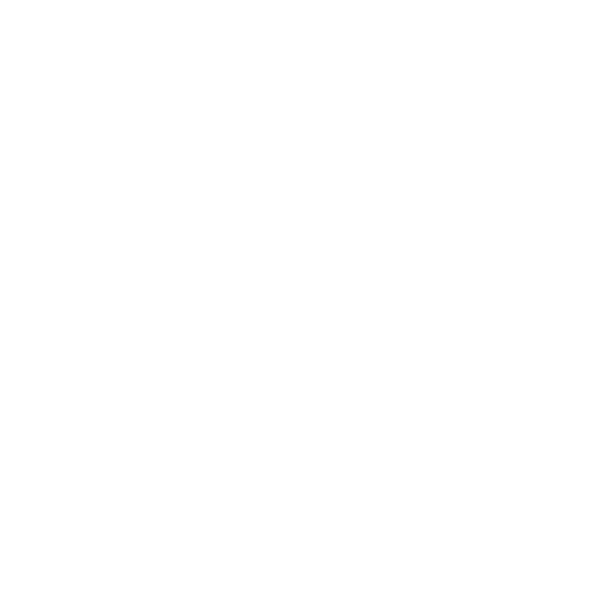

<IPython.core.display.Javascript object>


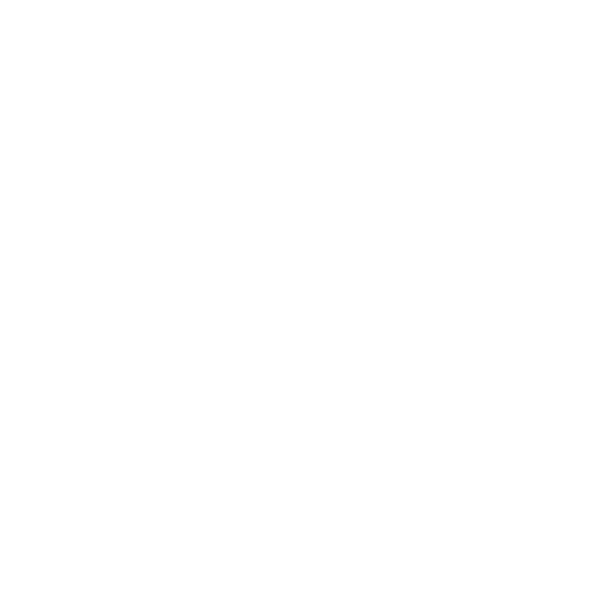

<IPython.core.display.Javascript object>


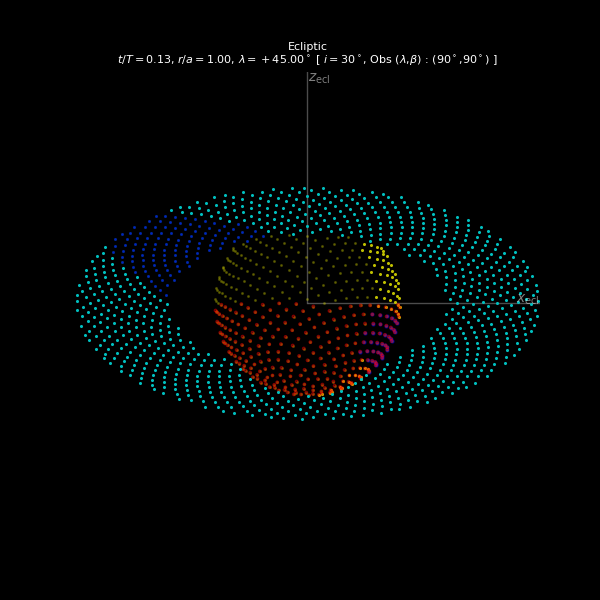

<IPython.core.display.Javascript object>


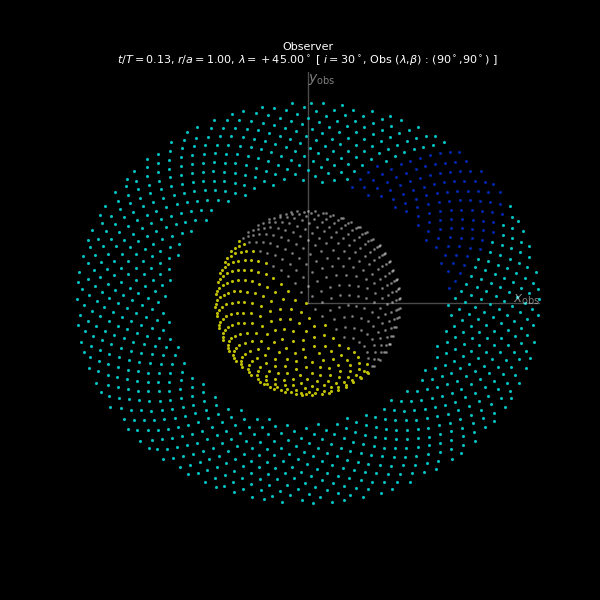

<IPython.core.display.Javascript object>


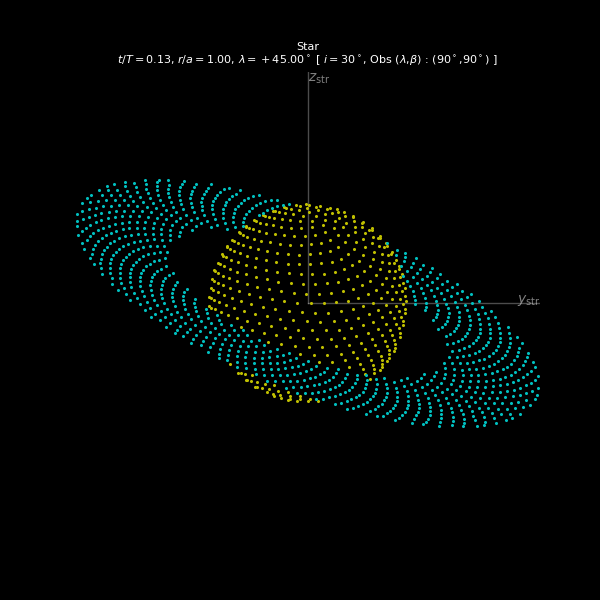

<IPython.core.display.Javascript object>


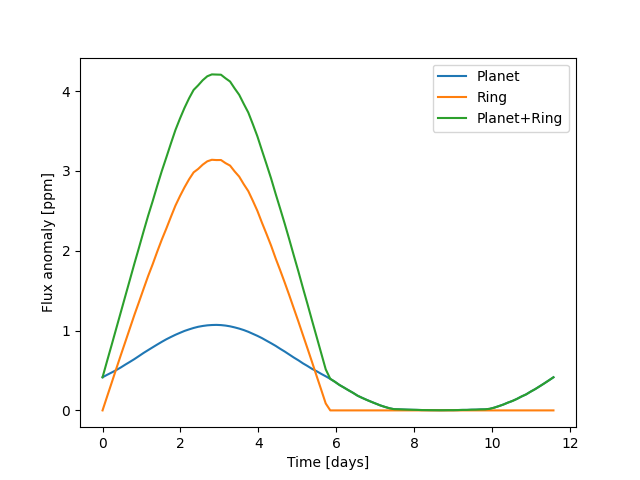

In [33]:
import pryngles as pr

RP=pr.RingedPlanet(Np=1000,Nr=1500,a=0.1,e=0.0)

RP.plotRingedPlanet()

RP.changeStellarPosition(45*pr.deg)
RP.plotRingedPlanet()

import numpy as np
RP.changeObserver([90*pr.deg,30*pr.deg])
lambs=np.linspace(+0.0*pr.deg,+360*pr.deg,100)
Rps=[]
Rrs=[]
ts=[]
for lamb in lambs:
    RP.changeStellarPosition(lamb)
    ts+=[RP.t*RP.CU.UT/pr.Const.days]
    RP.updateOpticalFactors()
    RP.updateDiffuseReflection()
    Rps+=[RP.Rip.sum()]
    Rrs+=[RP.Rir.sum()]

ts=np.array(ts)
Rps=np.array(Rps)
Rrs=np.array(Rrs)

#Plot
import matplotlib.pyplot as plt
fig=plt.figure()
ax=fig.gca()
ax.plot(ts,1e6*Rps,label="Planet")
ax.plot(ts,1e6*Rrs,label="Ring")
ax.plot(ts,1e6*(Rps+Rrs),label="Planet+Ring")

ax.set_xlabel("Time [days]")
ax.set_ylabel("Flux anomaly [ppm]")
ax.legend();

fig.savefig("gallery/example-light-curve.png")

In [ ]:
#Alternative
star=dict(hash='primary',m=1,R=1)
planet=dict(center='planet',m=1e-3,R=0.1)
ring=dict(center='planet',fi=1.5,fe=2.4))
observer=dict(center='primary',kind='fixed',beta=30*pr.deg,lamb=50*pr.deg)

pr.System(stars=star,planets=planet,rings=ring)

#Or alternatively
S=pr.System()
pr.addStar(**star)
pr.addPlanet(**planet)
pr.addRing(**ring)
pr.addObserver(**observer)

In [ ]:
sys=pr.System()

S=sys.add_star(orbit=dict(m=1),
            physics=dict(R=1,T=5500,g=1.3,Z=0.01),
            optics=dict(limb_coefficients=[1,1]))

P=sys.add_planet(center=S,
                orbit=dict(m=1e-3,a=0.5,e=0.2),
                physics=dict(R=0.1,),
                optics=dict(A=0.5,phase_function=pr.optics.lambert_pf)
                )

R1=sys.add_ring(center=P,
            physics=dict(fi=1.5,fe=2.5),
            optics=dict(A=0.5,phase_function=pr.optics.lambert_pf)
            )

In [ ]:
sys=pr.System(units=['au','msun','yr'],band=pr.photo.HST_F220W)

#Solar-like star
S=sys.add(
    kind="Star",
    orbit=dict(hash='Star',m=1),
    physics=dict(R=1*sys.units('rsun'),T=5700,Z=0.01,D=1300*sys.units('pc')),
    optics=dict(limb_coeffs=[1,1,1,1])
)

#Saturn-like planet
P=sys.add(
    kind="Planet",
    primary=S,
    orbit=dict(m=1e-3,a=0.5,e=0.2),
    physics=dict(R=1*sys.units('rsat')),
    optics=dict(A=0.5,w=1,phase_function=pr.optics.gas_lambert_pf)
)

#Ring with a Cassini-like Gap
ring_optics=dict(A=0.5,phase_function=pr.optics.solid_lambert_pf)
R1=sys.add(
    kind="Ring",
    primary=P,
    physics=dict(fi=1.5,fe=1.8),
    optics=ring_optics
)
R2=sys.add(
    kind="Ring",
    primary=P,
    physics=dict(fi=1.9,fe=2.5),
    optics=ring_optics.update(A=0.8)
)

In [ ]:
sys=pr.System()
S=sys.add(kind="Star",orbit=dict(hash='Star',m=1),physics=dict(R=1*sys.units('rsun')))
P=sys.add(kind="Planet",center=S,orbit=dict(m=1e-3,a=0.5,e=0.2),physics=dict(R=1*sys.units('rsat')))
R=sys.add(kind="Ring",center=P,physics=dict(fi=1.5,fe=1.8),optics=dict(A=0.5))

In [ ]:
S=pr.Star(
    orbit=dict(hash='Star',m=1),
    physics=dict(R=1*sys.units('rsun'),T=5700,Z=0.01),
    optics=dict(limb_coeffs=[1,1,1,1])
)
P=pr.Planet(
    primary=S,
    orbit=dict(m=1e-3,a=0.5,e=0.2),
    physics=dict(R=1*sys.units('rsat')),
    optics=dict(A=0.5,w=1,phase_function=pr.optics.gas_lambert_pf)
)
R=pr.Ring(
    primary=P,
    physics=dict(fi=1.5,fe=1.8),
    optics=dict(A=0.5,phase_function=pr.optics.solid_lambert_pf)
)
O=pr.Observer(
    orbit=dict(lamb=30*pr.deg,beta=60*pr.deg,D=1300*sys.units('pc')),
)
sys.System(stars=S,planets=P,rings=R,observers=O)